In [1]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Flatten, Reshape
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(len(x_train),28,28,1)
x_train=x_train.astype('float32')
x_train/=255
x_train=np.array(x_train)

x_test=x_test.reshape(len(x_test),28,28,1)
x_test=x_test.astype('float32')
x_test/=255
x_test=np.array(x_test)


Using TensorFlow backend.


In [2]:
def create_dense_ae():
    input_img=Input(shape=(28,28,1))
    flat_img = Flatten()(input_img)
    encoding_dim=49
    encoded=layers.Dense(encoding_dim,activation='relu')(flat_img)
    input_encoded=Input(shape=(encoding_dim,))
    flat_decoded=layers.Dense(28*28,activation='sigmoid')(input_encoded)
    decoded=Reshape((28,28,1))(flat_decoded)
    encoder= Model(input_img,encoded,name="encoder")
    decoder= Model(input_encoded,decoded,name="decoder")
    autoencoder=Model(input_img,decoder(encoder(input_img)))
    return encoder, decoder, autoencoder

In [3]:
e,d,a=create_dense_ae()
a.compile(optimizer='adam',loss='binary_crossentropy')

print(a.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
history = a.fit(x_train, x_train,batch_size=128, epochs=20,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2082 - val_loss: 0.1414
Epoch 2/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1251 - val_loss: 0.1102
Epoch 3/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1036 - val_loss: 0.0956
Epoch 4/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0925 - val_loss: 0.0879
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0865 - val_loss: 0.0836
Epoch 6/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0833 - val_loss: 0.0814
Epoch 7/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0817 - val_loss: 0.0802
Epoch 8/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0809 - val_loss: 0.0797
Epoch 9/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0803 - val_

In [5]:
imgs=x_test[:10]
enc_img=e.predict(imgs,batch_size=10)
enc_img[0]
dec_img=d.predict(enc_img,batch_size=10)

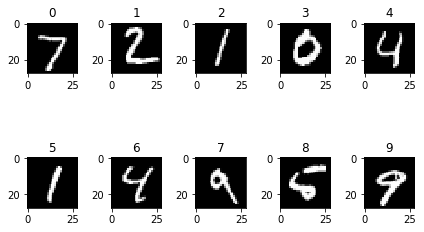

In [8]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
(x_train,y_train),(x_test,y_test)=mnist.load_data()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure()

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)

plt.tight_layout()
plt.show()

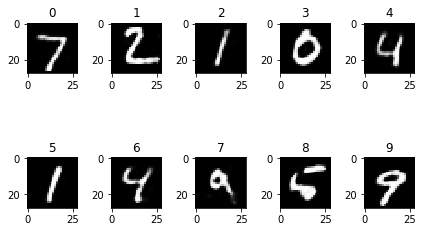

In [7]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
(x_train,y_train),(x_test,y_test)=mnist.load_data()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure()

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,5,num)
    ax.imshow(dec_img[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(i)

plt.tight_layout()
plt.show()

#### Отчет по теме: "Изучение работы сверточных нейронных сетей на основе MNIST "

In [9]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Flatten, Reshape
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(len(x_train),28,28,1)
x_train=x_train.astype('float32')
x_train/=255
x_train=np.array(x_train)

x_test=x_test.reshape(len(x_test),28,28,1)
x_test=x_test.astype('float32')
x_test/=255
x_test=np.array(x_test)


##### Создаем функцию глубого автоэнкодера

In [12]:
def deep_aenc():
    input_img = Input(shape = (28,28,1)) # Глубина цвета 1
    flat_img = Flatten()(input_img)
    dim = 49
    x = layers.Dense(dim*3, activation = 'relu')(flat_img)
    x = layers.Dense(dim*2, activation = 'relu')(x)
    encoded = layers.Dense(dim, activation = 'linear')(x)
    input_enc=Input(shape=(dim,))
    x = layers.Dense(dim*2, )(input_enc)
    x = layers.Dense(dim*3, )(x)
    flat_dec=layers.Dense(28*28,activation="sigmoid")(x)
    decoded=Reshape((28,28,1))(flat_dec)
    encoder= Model(input_img,encoded,name="encoder")
    decoder= Model(input_enc,decoded,name="decoder")
    autoencoder=Model(input_img,decoder(encoder(input_img)))
    return encoder, decoder, autoencoder

In [11]:
e,d,a=deep_aenc()
a.compile(optimizer='adam',loss='binary_crossentropy')

print(a.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 49)                134750    
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         135485    
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = a.fit(x_train, x_train,batch_size=128, epochs=10,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1680 - val_loss: 0.1176
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1097 - val_loss: 0.1008
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0978 - val_loss: 0.0933
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0924 - val_loss: 0.0891
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0888 - val_loss: 0.0864
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0863 - val_loss: 0.0843
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0844 - val_loss: 0.0827
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0829 - val_loss: 0.0815
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0817 - val_

In [14]:
imgs=x_test[:10]
enc_img=e.predict(imgs,batch_size=10)
enc_img[0]
dec_img=d.predict(enc_img,batch_size=10)

##### Выводим изображения до и после прохождения массива изображений через сверточную нейросеть

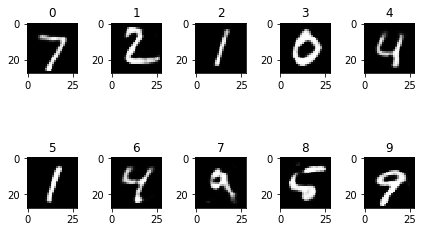

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure()

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,5,num)
    ax.imshow(dec_img[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(i)

plt.tight_layout()
plt.show()

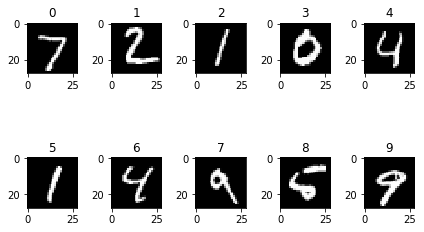

In [16]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
(x_train,y_train),(x_test,y_test)=mnist.load_data()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure()

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)

plt.tight_layout()
plt.show()

##### Создаем функции по зашумлению и очистке изображений

In [17]:
import tensorflow.keras.backend as k

def noise_f(x):
    noise = 0.5
    x= x+k.random_normal(x.get_shape(),0.5,noise)
    x=k.clip(x,0.,1.)
    return x

from tensorflow.keras.layers import Lambda
def noise_dec(deep_aenc):
    input_img = Input(batch_shape=(16,28,28,1))
    noise_img = Lambda(noise_f)(input_img)
    noises = Model(input_img ,noise_img, name="noise")
    denoises = Model(input_img, deep_aenc(noises(input_img)) )
    return noises,denoises

no,deno = noise_dec(a)

In [18]:
deno.compile(optimizer='adam',loss='binary_crossentropy')

print(deno.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(16, 28, 28, 1)]         0         
_________________________________________________________________
noise (Model)                (16, 28, 28, 1)           0         
_________________________________________________________________
model_1 (Model)              multiple                  270235    
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Flatten, Reshape
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(len(x_train),28,28,1)
x_train=x_train.astype('float32')
x_train/=255
x_train=np.array(x_train)

x_test=x_test.reshape(len(x_test),28,28,1)
x_test=x_test.astype('float32')
x_test/=255
x_test=np.array(x_test)

history = deno.fit(x_train, x_train,batch_size=16, epochs=10,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 311us/sample - loss: 0.1255 - val_loss: 0.1240
Epoch 2/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1250 - val_loss: 0.1237
Epoch 3/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.1246 - val_loss: 0.1236
Epoch 4/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1243 - val_loss: 0.1218
Epoch 5/10
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1239 - val_loss: 0.1221
Epoch 6/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1236 - val_loss: 0.1220
Epoch 7/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1232 - val_loss: 0.1215
Epoch 8/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1231 - val_loss: 0.1210
Epoch 9/10
60000/60000 [==============================] - 19s 317us/sample - l

In [25]:
n = 10
batch_size = 16
imgs = x_test[:batch_size]
noised_imgs = no.predict(imgs, batch_size=batch_size)
encoded_imgs = e.predict(noised_imgs[:n], batch_size=n)
decoded_imgs = d.predict(encoded_imgs[:n], batch_size=n)

##### Создаем функцию по выводу получившихся изображений.

In [31]:
def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])

    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()        

##### Выводим изображения  по типу: начальные, с шумом, очищенные от шума.

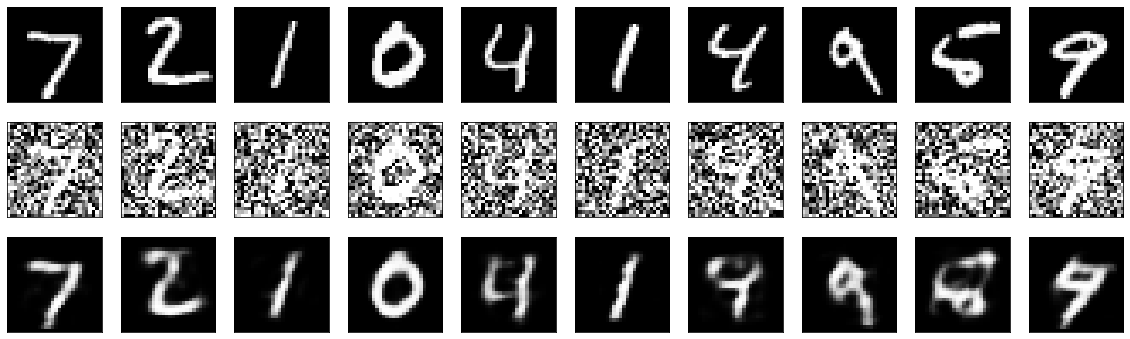

In [32]:
plot_digits(imgs[:n], noised_imgs, decoded_imgs)